[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/pycroscopy/pycroscopy/blob/main/jupyter_notebooks/Inpainting_example.ipynb)

# Image inpainting using skimage

**Prepared by Utkarsh Pratiush**


05/26/2024



In [3]:
import sidpy
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# download the data
!gdown --id 137YOVeNFiBzH06zhxoaeKTpajwKKb9J9

/Users/utkarshpratiush/opt/anaconda3/envs/gerd_course/lib/python3.10/site-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=137YOVeNFiBzH06zhxoaeKTpajwKKb9J9
To: /Users/utkarshpratiush/project/hackathon_notebooks/pycroscopy/inpainting/topo_spiral_data_r1.npz
100%|████████████████████████████████████████| 481k/481k [00:00<00:00, 3.53MB/s]


In [5]:
data = np.load("topo_spiral_data_r1.npz")
topo_data = data["topo_data"]
mask_data = data["mask_data"]

In [6]:
dataset_inpaint = sidpy.Dataset.from_array(topo_data)
dataset_inpaint.data_type = sidpy.DataType.IMAGE
dataset_inpaint.set_dimension(0, sidpy.Dimension(topo_data.shape[0],
                                        name='x',
                                        units='nm', quantity='x',
                                        dimension_type='spatial'))
dataset_inpaint.set_dimension(1, sidpy.Dimension(topo_data.shape[1],
                                        name='y',
                                        units='nm', quantity='y',
                                        dimension_type='spatial'))
dataset_inpaint.metadata = {"mask": mask_data}

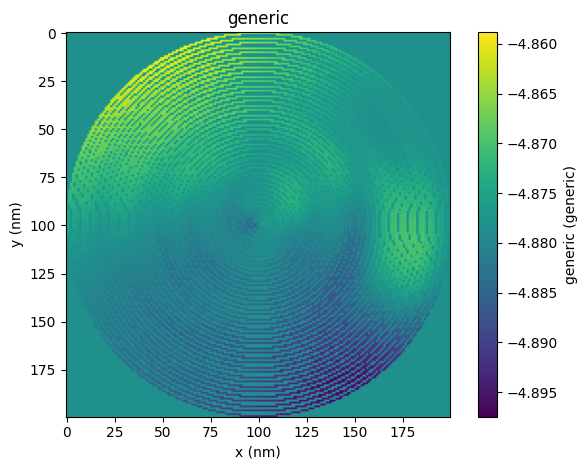

In [7]:
view = dataset_inpaint.plot()

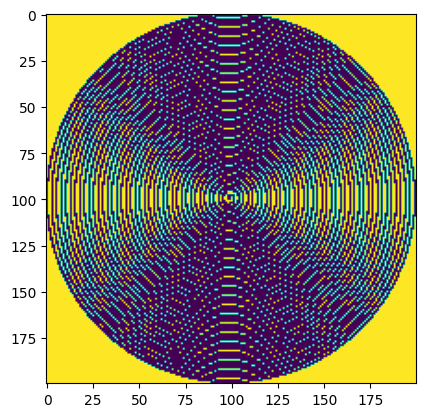

In [8]:
plt.imshow(dataset_inpaint.metadata["mask"])

In [9]:
from pycroscopy.image import inpaint_image

In [10]:
inpainted_data = inpaint_image(dataset_inpaint)

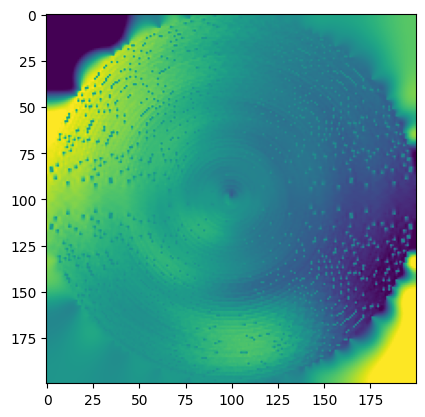

In [11]:
plt.imshow(inpainted_data)